# Deep Neural Network 

## Session - 02 (Hidden Layer)

### **Implement Perceptron with Sigmoid activation Function**

## Import Statements

In [71]:
###-----------------
### Import Libraries
###-----------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

## Setup Global Parameters

In [72]:
###----------------
### Some parameters
###----------------

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2 # The random/undpredicted fluctuations generated during generation of dataset (Noise can degrade the performance also as well as can improve the robustness also) 
EPOCHS = 2000 # number of epochs - The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

## Generate Data Set
<div style="font-family: Arial; font-size:1.2em;">
Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a> dataset generator.
</div>

In [73]:
# make_moon is a in-built library which generates two class classification dataset

X, y = datasets.make_moons(n_samples=N_SAMPLES, 
                           shuffle=True, 
                           noise=NOISE, 
                           random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0], dtype=int64))

## Visualization
<p style="font-family: Arial; font-size:1.2em">
DataFrames are easier to visualize
</p>

In [74]:
data_df = pd.DataFrame(X, columns = ['A', 'B'])

data_df['target'] = y

data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [75]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [76]:
data_df.describe() # Generate descriptive statistic

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


In [77]:
# what labels are present?
data_df.target.unique()

array([0, 1], dtype=int64)

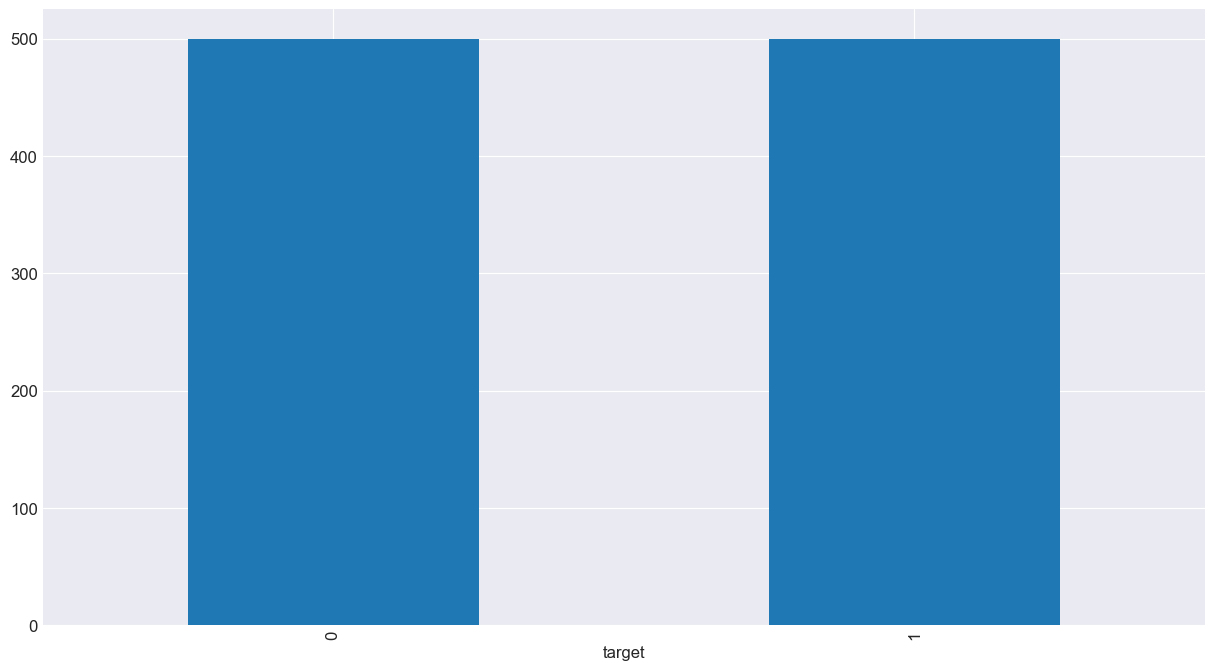

In [78]:
fig, ax = plt.subplots() # Instantiate
    
data_df['target'].value_counts().plot(ax=ax, kind='bar');

### Different ways of plotting data

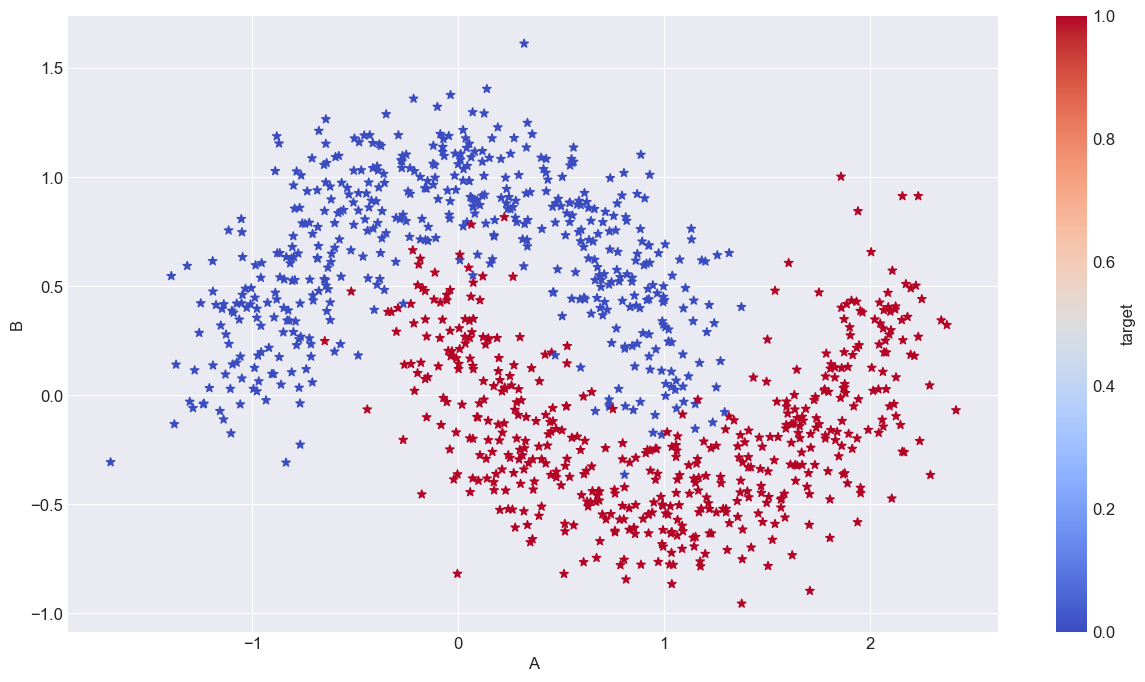

In [79]:
# Plot the data
data_df.plot.scatter('A', 'B',      # columns to plot (x=A, y=B)
                     s = 40,        # size of the marker
                     marker = '*',  # type of marker
                     c = 'target',  # color as per target column
                     cmap=CMAP);    # using colormap

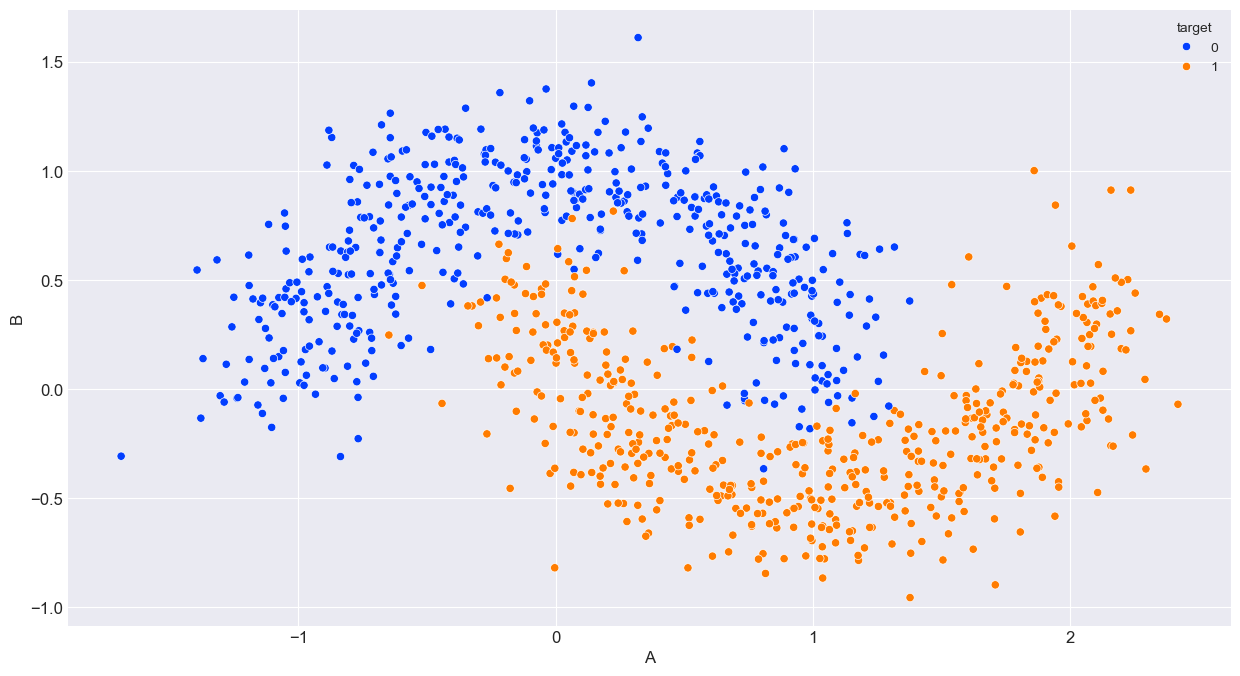

In [80]:
# Using Seaborn
ax = sns.scatterplot(data=data_df, # data from dataframe
                     x='A', y='B',  # X axis and y axis columns
                     palette=sns.color_palette("bright", 2), # color map
                    hue='target'); # Color as per target column

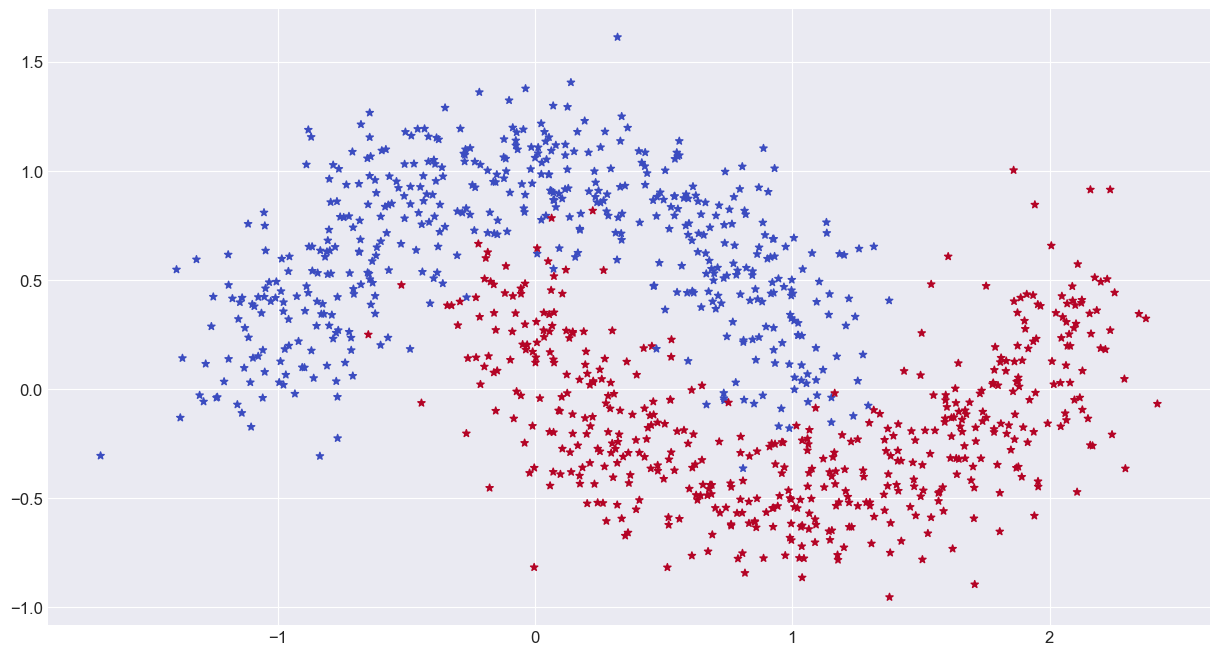

In [81]:
#### In case you want to plot X Array directly
plt.scatter(X[:,0], X[:,1], s=30, c=y, marker = '*', cmap=CMAP);

In [82]:
features_df = data_df.drop('target', axis=1)

labels = data_df['target']

X_train, X_test, y_train, y_test = train_test_split(features_df, 
                                                    labels, 
                                                    test_size = TEST_SIZE, 
                                                    random_state=RANDOM_STATE, 
                                                    stratify=labels)

In [83]:
print(X_train.shape)
print(X_test.shape)

(800, 2)
(200, 2)


In [84]:
type(X_train), type(X_test)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [85]:
X_train

,A,B
182,2.158117,-0.258680
723,-0.272601,1.072150
414,-1.052440,0.421482
540,0.917266,0.436605
854,-1.378886,-0.132622
...,...,...
627,1.505717,-0.349545
901,-0.557157,0.848979
846,1.092165,-0.623300
395,0.762442,-0.450335


In [86]:
def sigmoid(z):
    return 1 / ( 1 + np.exp ( -z ) )

In [87]:
def fn_activ(z): # g(z)
    return np.tanh(z)

def fn_activ_prime(a): # g'(z)
    return 1. - np.tanh(a)**2

In [88]:
def predict(model, X_p):
    
    W1 = model['W1']
    W2 = model['W2']
    b1 = model['b1']
    b2 = model['b2']
    
    # Forward Propagation
        
    # Layer - 1
    
    z1 = X_p.dot(W1) + b1 # Aggregation Function
    a1 = fn_activ(z1) # Activation Function
    
    # Layer - 2
    
    z2 = a1.dot(W2) + b2 # Aggregation Function
    a2 = sigmoid(z2) # Activation Function
        
    return a2 >= 0.5 # It will return 0 (False) and 1 (True) for condition mentioned i.e. 'a2>=0.5'

In [89]:
def calculate_loss(model, X_l, y_l):
    
    W1 = model['W1']
    W2 = model['W2']
    b1 = model['b1']
    b2 = model['b2']
    
    m = X_l.shape[0]
    
    # Layer - 1
    
    z1 = X_l.dot(W1) + b1 # Aggregation Function
    a1 = fn_activ(z1) # Activation Function
    
    # Layer - 2
    
    z2 = a1.dot(W2) + b2 # Aggregation Function
    a2 = sigmoid(z2) # Activation Function
    
    data_loss = -(y_l*np.log(a2)).sum() # Binary
        
    return data_loss / m

In [90]:
# Stochastic Gradient Descent

# No. of features is fixed, Hence Input shape is Fixed
# No. of Output is fixed, Hence Output shape is Fixed

def build_model(X_train, y_train, nn_hdim, nn_out, epochs=EPOCHS, alpha=ALPHA):
    
    '''
    Args: 
    
        'X_train':Training features, 
        'y_train':Training labels, 
        'nn_out':Size of Output,
        'nn_hdim':No. of nodes in hidden layer
    '''
    m, nn_input_dim = X_train.shape
    nn_output_dim = nn_out
    
    W1 = rng.random((nn_input_dim,nn_hdim), 
             dtype=np.float32) / np.sqrt(nn_input_dim)  # This line will be explained after 2-3 lectures, Today's Dt. 16/05/24 
    
    W2 = rng((nn_hdim, nn_output_dim), 
             dtype=np.float32) / np.sqrt(nn_hdim)
    
    b1 = np.zeros((1, nn_hdim), dtype=np.float32)
    b2 = np.zeros((1, nn_output_dim), dtype=np.float32)
    
    curr_loss = 0
    
    loss,epoch = [], []
    
    for i in range(0,epochs):
        
        # Forward Propagation
        
        # Layer - 1
        
        z1 = X_train.dot(W1) + b1
        a1 = fn_activ(z1)
        
        # Layer - 2
        
        z2 = a1.dot(W2) + b2
        a2 = sigmoid(z2)
        
        # Backward Propagation
        
        assert(a2.shape == y_train.shape), f'check y {a2.shape}/{y_train.shape}'
        dz2 = a2 - y_train # Remember: a2 & y dimensions need to be same
        
        dW2 = (a1.T).dot(dz2)
        assert(W2.shape == dW2.shape), f'check W2 {W2.shape}/{dW2.shape}'
        
        db2 = np.sum(dz2, axis = 0, keepdims=True)
        assert(b2.shape == db2.shape), f'check b2 {b2.shape}/{db2.shape}'
        
        da1 = dz2.dot(W2.T)
        assert(a2.shape == da1.shape), f'check a2 {a2.shape}/{da1.shape}'
        
        # Layer - 1
        
        dz1 = da1 * fn_activ_prime(z1)
        assert(z1.shape == dz1.shape), f'check a2 {z1.shape}/{dz1.shape}'
        
        dW1 = (X_train.T).dot(dz1)
        assert(W1.shape == dW1.shape), f'check W1 {W1.shape}/{dW1.shape}'
        
        db1 = np.sum(dz1, axis = 0, keepdims=True)
        assert(b1.shape == db1.shape), f'check b1 {b1.shape}/{db1.shape}'
        
        # Gradient Update
        
        W1 += -alpha * dW1 / m
        b1 += -alpha * db1 / m
        
        W2 += -alpha * dW2 / m
        b2 += -alpha * db2 / m
        
        model = {'W1':W1, 'b1':b1, 
                 'W2':W2, 'b2':b2}
    
        curr_loss = calculate_loss(model , X_train, y_train)
        loss.append(curr_loss)
        
        epoch.append(i)
        
        
    
    loss_hist['epoch']= epoch
    loss_hist['loss']= loss
    
    return model

In [ ]:
loss_hist = {}


In [91]:
print(y_train.shape)
y_train = y_train.reshape(-1,1)
print(y_train.shape)

(800,)


AttributeError: 'Series' object has no attribute 'reshape'

In [ ]:
nn_output_dim = 1
nn_hdim = 4

model = build_model(X_train, y_train, nn_hdim, nn_output_dim)

TypeError: 'numpy.random._generator.Generator' object is not callable

In [ ]:
model

In [ ]:
y_pred = predict(model, X_train)
accuracy_score(y_test,y_pred)


In [ ]:
min(errors)

In [ ]:
ax = plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Errors')

In [ ]:
X = df_train
fig,ax = plt.subplots()
dm =0.05 # Grid Spacing
x_min , x_max = X[:,0].min() - 0.05 , X[:, 0].max() + 0.05
y_min , y_max = X[:,1].min() - 0.05 , X[:, 1].max() + 0.05

# np.meshagrid(): Return a list of coordinate matrices from coordinate vectors.
xx , yy  = np.meshgrid(np.arange(x_min,x_max,dm),
                       np.arange(y_min,y_max,dm))

#.c_: Translates slice objects to concatenation along the second axis.
XX = np.c_[xx.ravel(),yy.ravel()]

# np.hstack(): Stack arrays in sequence horizontally (column wise).
XX = np.hstack((XX, np.ones((XX.shape[0] , 1))))

y_pred = []

for row in XX:
    pred = predict(row , weights)
    y_pred.append(np.round(pred))
z = np.array(y_pred).reshape(xx.shape)

ax.contourf(xx,yy,z ,cmap = CMAP , alpha =0.8)
ax.scatter(X[:,0], X[:,1], c=X[:,2], edgecolors='k', cmap=plt.cm.bwr)

## Training Data

In [ ]:
predictions = []

for row in df_train:
    pred = predict(row, weights)
    y_pred = 1 if pred >=0.5 else 0
    predictions.append(y_pred)
    

accuracy_score(df_train[:,-1], predictions)

## Testing Data

In [ ]:
predictions = []

for row in df_test:
    pred = predict(row, weights)
    y_pred = 1 if pred >=0.5 else 0
    predictions.append(y_pred)
    

accuracy_score(df_test[:,-1], predictions)

In [ ]:
cm = confusion_matrix(df_test[:,-1], predictions)
cm

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [0,1])

fig, ax = plt.subplots()

disp.plot(ax=ax, cmap='Blues')

ax.grid(False)